# Admission prediction 

About Dataset
Context
This dataset is created for prediction of Graduate Admissions from an Indian perspective.

Content
The dataset contains several parameters which are considered important during the application for Masters Programs.
The parameters included are :

GRE Scores ( out of 340 )
TOEFL Scores ( out of 120 )
University Rating ( out of 5 )
Statement of Purpose and Letter of Recommendation Strength ( out of 5 )
Undergraduate GPA ( out of 10 )
Research Experience ( either 0 or 1 )
Chance of Admit ( ranging from 0 to 1 )

Acknowledgements
This dataset is inspired by the UCLA Graduate Dataset. The test scores and GPA are in the older format.

Inspiration
This dataset was built with the purpose of helping students in shortlisting universities with their profiles. The predicted output gives them a fair idea about their chances for a particular university.

# Importing Libraries

In [1]:
import pandas as pd        # for data manipulation
import numpy as np         # for mathematical calculations
import seaborn as sns      # for data visualization

import matplotlib.pyplot as plt  #for graphical analysis
%matplotlib inline

from scipy.stats import zscore # to remove outliers

from sklearn.preprocessing import StandardScaler  # for normalize the model
from sklearn.preprocessing import LabelEncoder  # to convert object into int


from sklearn.model_selection import train_test_split  # for train and test model

import warnings                      # to ignore any warnings
warnings.filterwarnings("ignore")

from sklearn import metrics  # for model evaluation
from sklearn.metrics import r2_score, mean_squared_error as mse, mean_absolute_error as mae

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


# Load Dataset

In [2]:
data=pd.read_csv('/kaggle/input/graduate-admissions/Admission_Predict.csv')
data 

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65
...,...,...,...,...,...,...,...,...,...
395,396,324,110,3,3.5,3.5,9.04,1,0.82
396,397,325,107,3,3.0,3.5,9.11,1,0.84
397,398,330,116,4,5.0,4.5,9.45,1,0.91
398,399,312,103,3,3.5,4.0,8.78,0,0.67


In [3]:
df=pd.read_csv('/kaggle/input/graduate-admissions/Admission_Predict_Ver1.1.csv')
df

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65
...,...,...,...,...,...,...,...,...,...
495,496,332,108,5,4.5,4.0,9.02,1,0.87
496,497,337,117,5,5.0,5.0,9.87,1,0.96
497,498,330,120,5,4.5,5.0,9.56,1,0.93
498,499,312,103,4,4.0,5.0,8.43,0,0.73


# Dimensions of Dataset

In [4]:
# check the no. of rows & column & finding the count of missing value
print(data.shape)
print(data.isna().sum())
#printing the summary of data type
data.info() 

(400, 9)
Serial No.           0
GRE Score            0
TOEFL Score          0
University Rating    0
SOP                  0
LOR                  0
CGPA                 0
Research             0
Chance of Admit      0
dtype: int64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Serial No.         400 non-null    int64  
 1   GRE Score          400 non-null    int64  
 2   TOEFL Score        400 non-null    int64  
 3   University Rating  400 non-null    int64  
 4   SOP                400 non-null    float64
 5   LOR                400 non-null    float64
 6   CGPA               400 non-null    float64
 7   Research           400 non-null    int64  
 8   Chance of Admit    400 non-null    float64
dtypes: float64(4), int64(5)
memory usage: 28.2 KB


In [5]:
#first remove duplicates & recheck the size
data.drop_duplicates(inplace=True)

print(data.shape)

(400, 9)


As we seen there is no null values as well as no duplicates found so lets move further.

In [6]:
# As we saw there are some gap found in below two featurs so lets first remane the same and start our work
data.rename(columns={'LOR ':'LOR', 'Chance of Admit ':'Chance of Admit'}, inplace=True)

In [7]:
data. columns

Index(['Serial No.', 'GRE Score', 'TOEFL Score', 'University Rating', 'SOP',
       'LOR', 'CGPA', 'Research', 'Chance of Admit'],
      dtype='object')

# Statistical Summary

In [8]:
# Lets understand data at high level check the stastics of dataset
data.describe(include='all')

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
count,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000
mean,200.500000,316.807500,107.410000,3.087500,3.400000,3.452500,8.598925,0.547500,0.724350
std,115.614301,11.473646,6.069514,1.143728,1.006869,0.898478,0.596317,0.498362,0.142609
min,1.000000,290.000000,92.000000,1.000000,1.000000,1.000000,6.800000,0.000000,0.340000
25%,100.750000,308.000000,103.000000,2.000000,2.500000,3.000000,8.170000,0.000000,0.640000
50%,200.500000,317.000000,107.000000,3.000000,3.500000,3.500000,8.610000,1.000000,0.730000
75%,300.250000,325.000000,112.000000,4.000000,4.000000,4.000000,9.062500,1.000000,0.830000
max,400.000000,340.000000,120.000000,5.000000,5.000000,5.000000,9.920000,1.000000,0.970000


In [9]:
# first lets drop the unnecessary columns
data.drop(columns='Serial No.', axis=1, inplace=True)

In [10]:
data.head(2)

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,337,118,4,4.5,4.5,9.65,1,0.92
1,324,107,4,4.0,4.5,8.87,1,0.76


# Data Visualization

# Univariate Plots

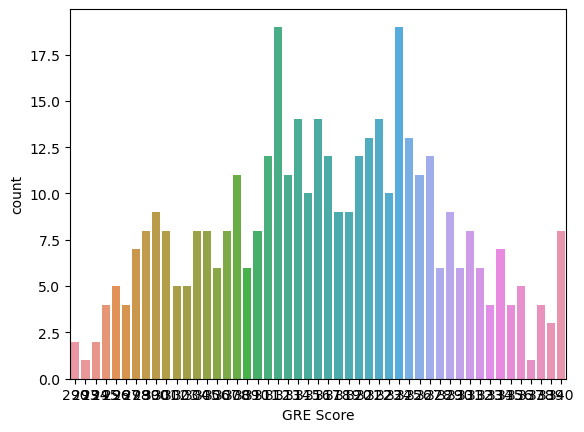

337     1
293     1
294     2
290     2
339     3
295     4
297     4
338     4
333     4
335     4
302     5
336     5
303     5
296     5
332     6
328     6
330     6
306     6
309     6
334     7
298     7
305     8
304     8
299     8
331     8
301     8
310     8
340     8
307     8
329     9
318     9
319     9
300     9
323    10
315    10
313    11
326    11
308    11
327    12
311    12
320    12
317    12
325    13
321    13
322    14
316    14
314    14
312    19
324    19
Name: GRE Score, dtype: int64


In [11]:
#plot each class frequency
sns.countplot(x='GRE Score',data=data)
plt.show()
print(data['GRE Score'].value_counts(ascending=True))

From graph we can see the maximum 19 student has got 324 & 312 GRE score.

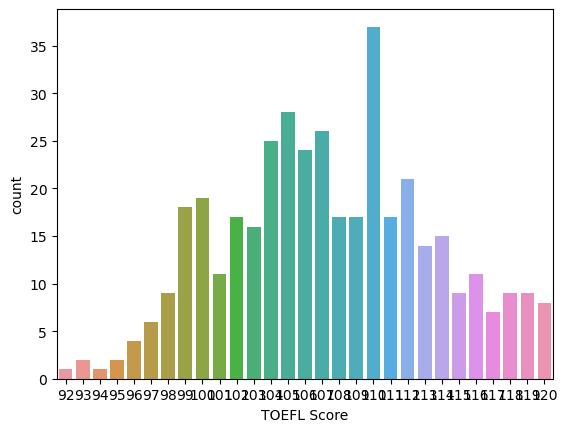

110    37
105    28
107    26
104    25
106    24
112    21
100    19
99     18
111    17
108    17
102    17
109    17
103    16
114    15
113    14
101    11
116    11
98      9
118     9
119     9
115     9
120     8
117     7
97      6
96      4
93      2
95      2
94      1
92      1
Name: TOEFL Score, dtype: int64


In [12]:
#plot each class frequency
sns.countplot(x='TOEFL Score',data=data)
plt.show()
print(data['TOEFL Score'].value_counts())

From graph we can see the maximum 37 student has got 110 TOFEL score.

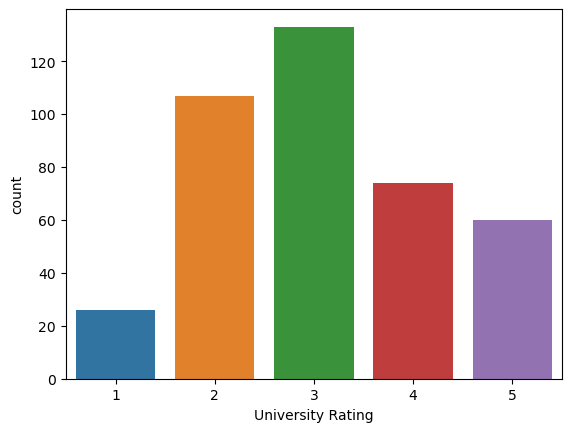

3    133
2    107
4     74
5     60
1     26
Name: University Rating, dtype: int64


In [13]:
#plot each class frequency
sns.countplot(x='University Rating',data=data)
plt.show()
print(data['University Rating'].value_counts())

ther are almost 133 university's how hvae 3 star. and the count of 4 and 5 star is less.

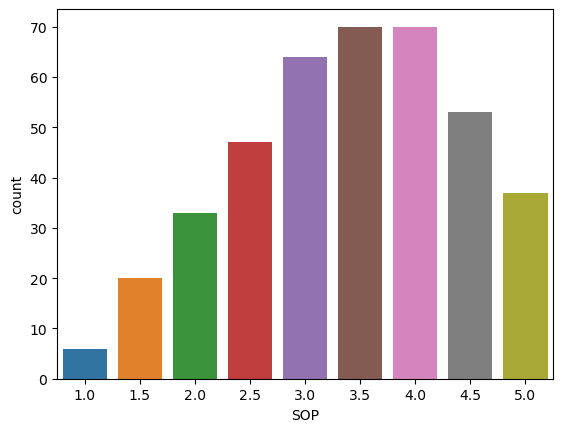

4.0    70
3.5    70
3.0    64
4.5    53
2.5    47
5.0    37
2.0    33
1.5    20
1.0     6
Name: SOP, dtype: int64


In [14]:
#plot each class frequency
sns.countplot(x='SOP',data=data)
plt.show()
print(data['SOP'].value_counts())

from graph we cam see the count of Statement of Purpose and Letter of Recommendation Strength ( out of 5 ). So, the maximum rating is 4 with count of 70.

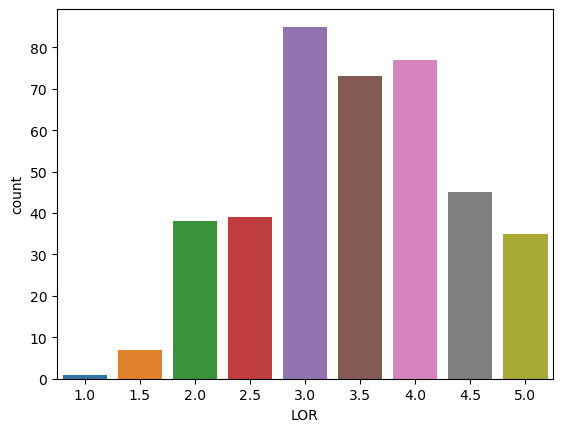

3.0    85
4.0    77
3.5    73
4.5    45
2.5    39
2.0    38
5.0    35
1.5     7
1.0     1
Name: LOR, dtype: int64


In [15]:
#plot each class frequency
sns.countplot(x='LOR',data=data)
plt.show()
print(data['LOR'].value_counts())

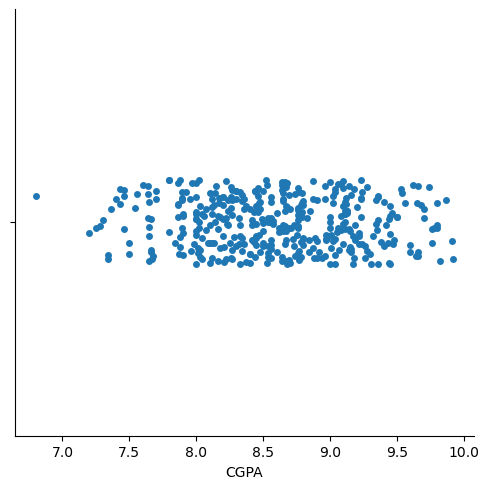

8.00    9
8.76    8
8.56    7
9.11    6
8.64    6
       ..
9.32    1
9.48    1
9.56    1
7.28    1
7.96    1
Name: CGPA, Length: 168, dtype: int64


In [16]:
#plot each class frequency
sns.catplot(x='CGPA',data=data)
plt.show()
print(data['CGPA'].value_counts())

As we seen the CGPA rate is in between 7 to 10.

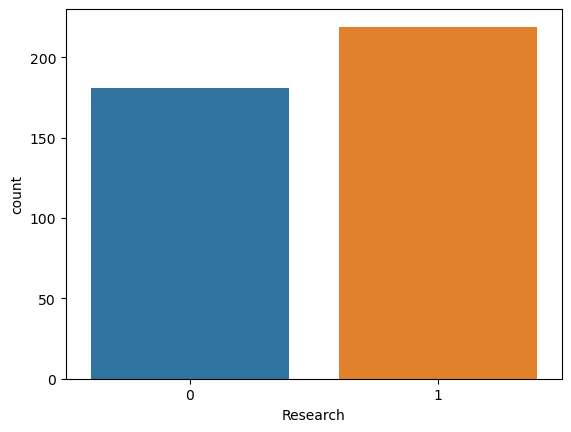

1    219
0    181
Name: Research, dtype: int64


In [17]:
#plot each class frequency
sns.countplot(x='Research',data=data)
plt.show()
print(data['Research'].value_counts())

the maximum count of Research Experience is 1

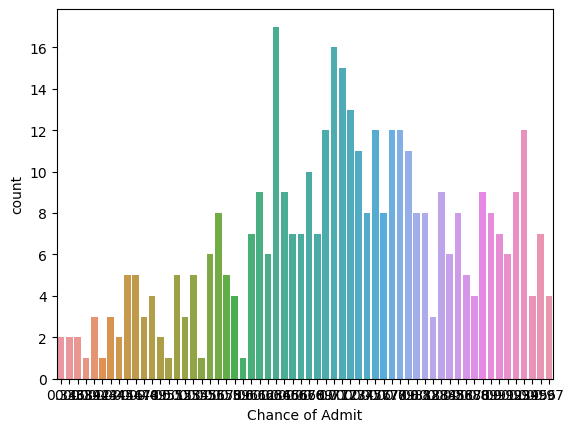

0.64    17
0.71    16
0.72    15
0.73    13
0.94    12
0.79    12
0.76    12
0.70    12
0.78    12
0.74    11
0.80    11
0.68    10
0.93     9
0.84     9
0.89     9
0.65     9
0.62     9
0.82     8
0.86     8
0.75     8
0.90     8
0.57     8
0.81     8
0.77     8
0.91     7
0.69     7
0.96     7
0.66     7
0.61     7
0.67     7
0.85     6
0.63     6
0.56     6
0.92     6
0.58     5
0.46     5
0.87     5
0.54     5
0.52     5
0.47     5
0.59     4
0.49     4
0.97     4
0.88     4
0.95     4
0.53     3
0.48     3
0.44     3
0.42     3
0.83     3
0.38     2
0.34     2
0.36     2
0.45     2
0.50     2
0.43     1
0.51     1
0.55     1
0.60     1
0.39     1
Name: Chance of Admit, dtype: int64


In [18]:
#plot each class frequency
sns.countplot(x='Chance of Admit',data=data)
plt.show()
print(data['Chance of Admit'].value_counts())

from count we can see that the minimum percentage of Chance of Admit if 39% and maximum is 97%.

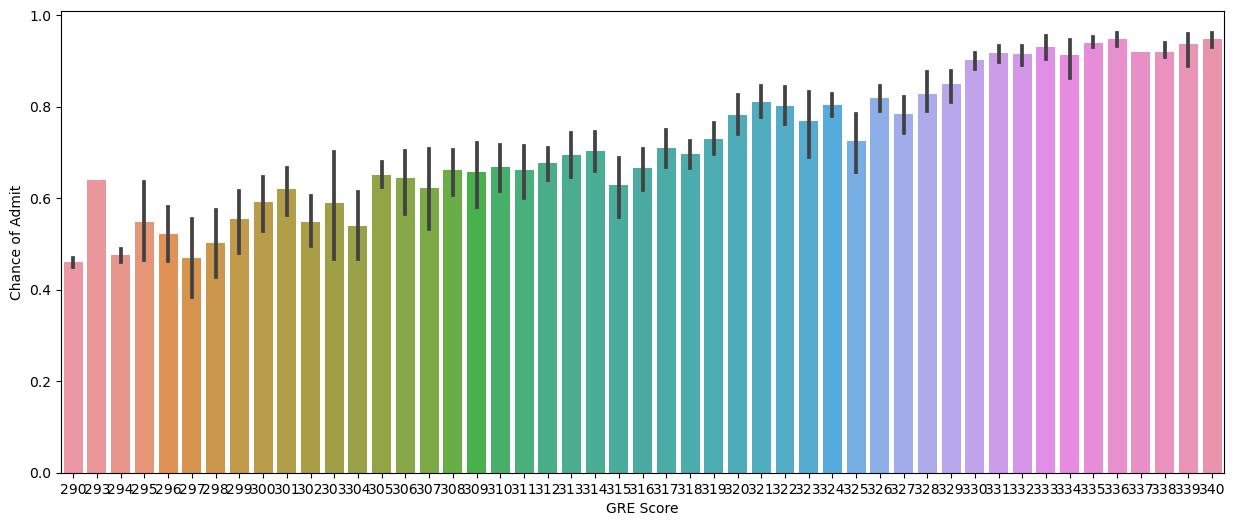

In [19]:
#Bivariant graph
plt.figure(figsize =(15,6))
sns.barplot(y ='Chance of Admit', x ='GRE Score', data = data)
plt.show()









as we seen as ther GRE Score incrested the chance of admission will increased.

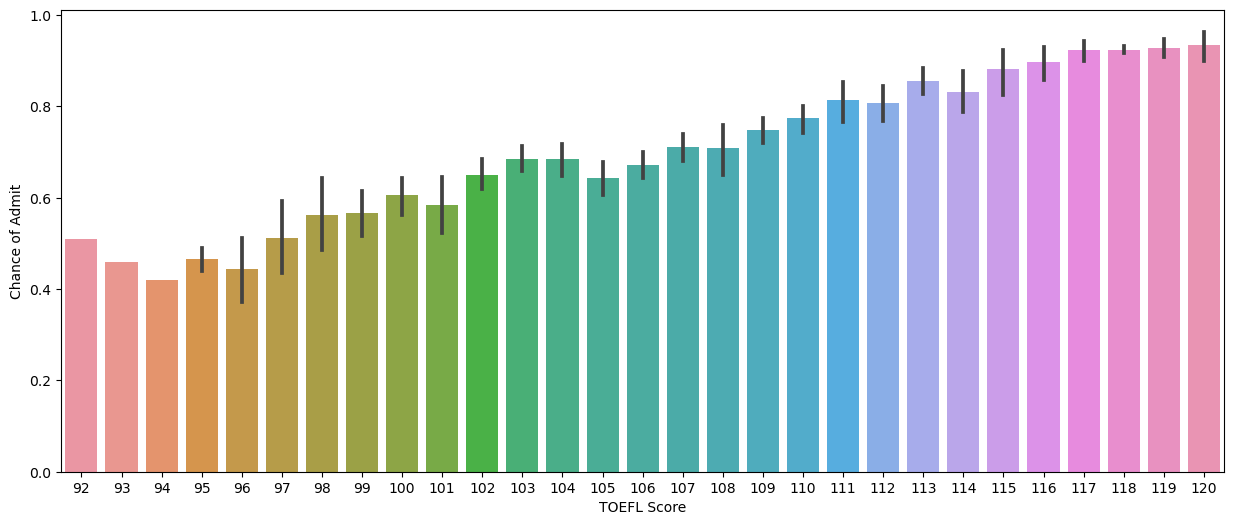

In [20]:
#Bivariant graph
plt.figure(figsize =(15,6))
sns.barplot(y ='Chance of Admit', x ='TOEFL Score', data = data)
plt.show()

as we seen as ther TOFEL Score incrested the chance of admission will increased.

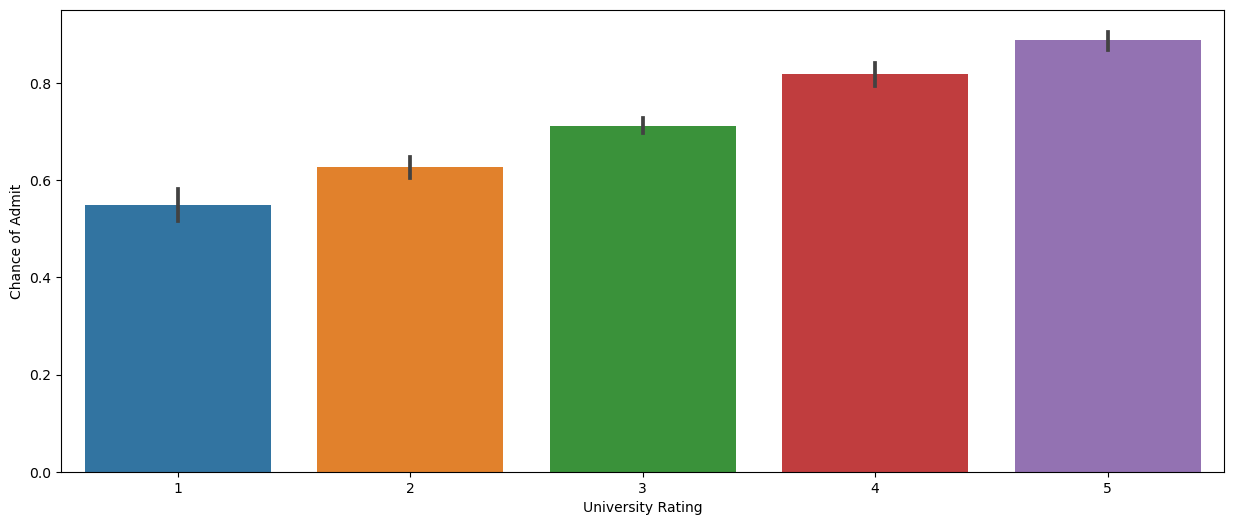

In [21]:
#Bivariant graph
plt.figure(figsize =(15,6))
sns.barplot(y ='Chance of Admit', x ='University Rating', data = data)
plt.show()

As we seen the maximum rating has the maximum admissions.

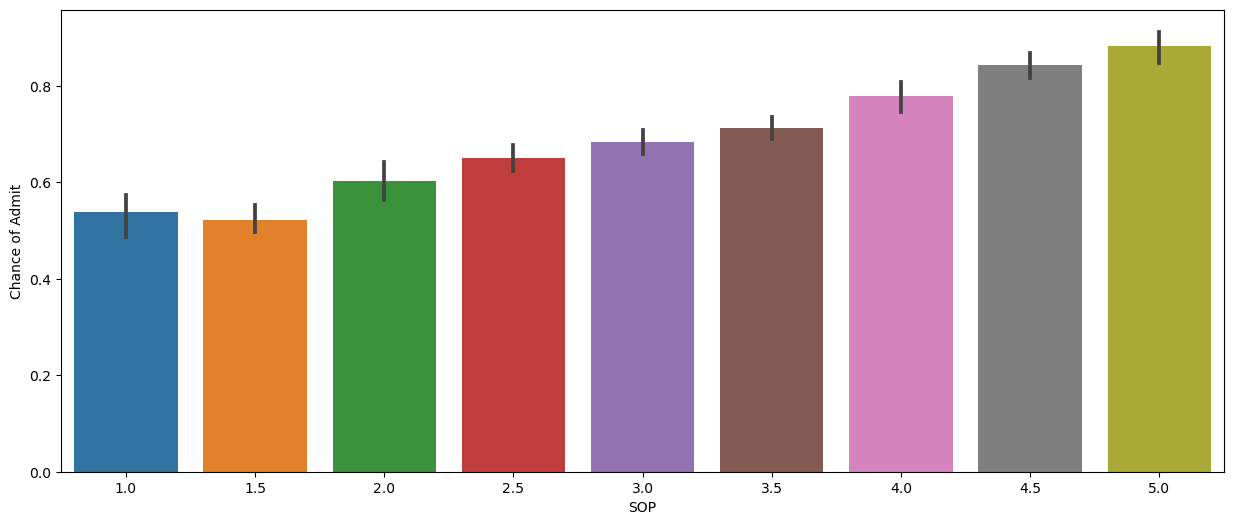

In [22]:
#Bivariant graph
plt.figure(figsize =(15,6))
sns.barplot(y ='Chance of Admit', x ='SOP', data = data)
plt.show()

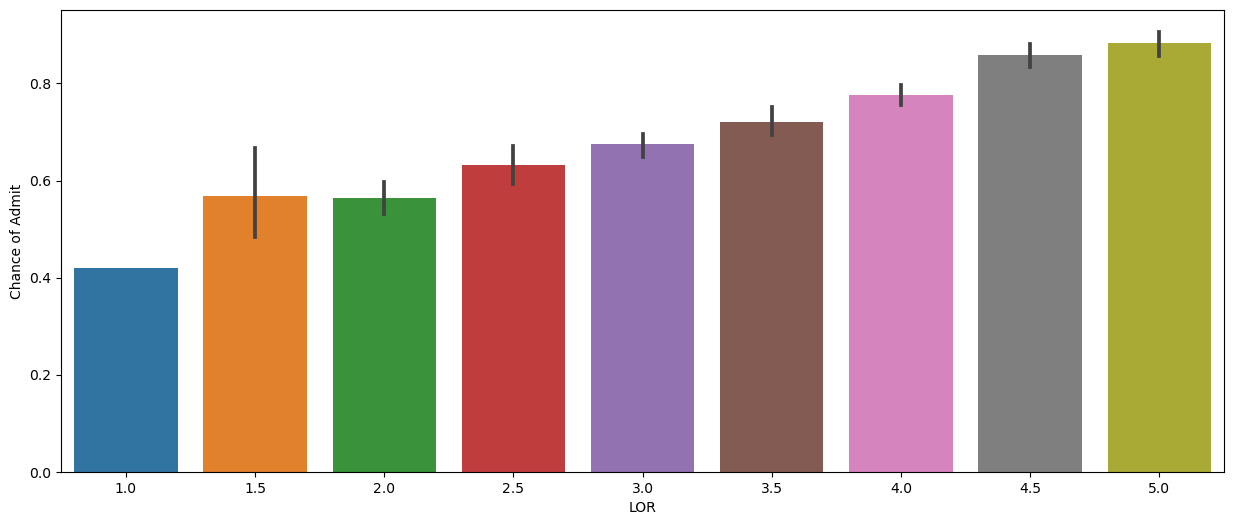

In [23]:
#Bivariant graph
plt.figure(figsize =(15,6))
sns.barplot(y ='Chance of Admit', x ='LOR', data = data)
plt.show()

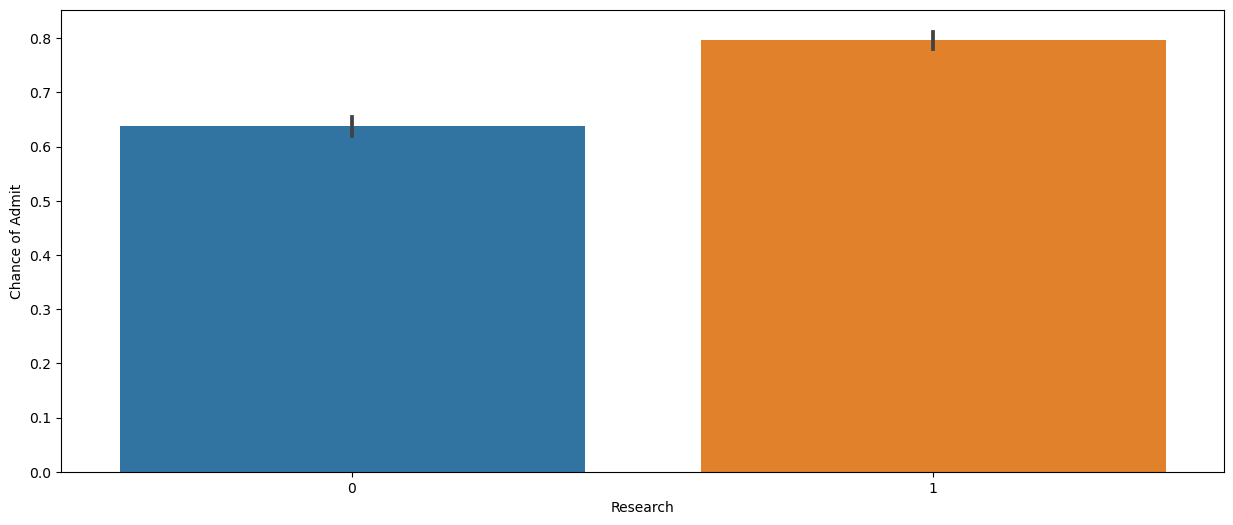

In [24]:
#Bivariant graph
plt.figure(figsize =(15,6))
sns.barplot(y ='Chance of Admit', x ='Research', data = data)
plt.show()

Chance of admission is more in research.

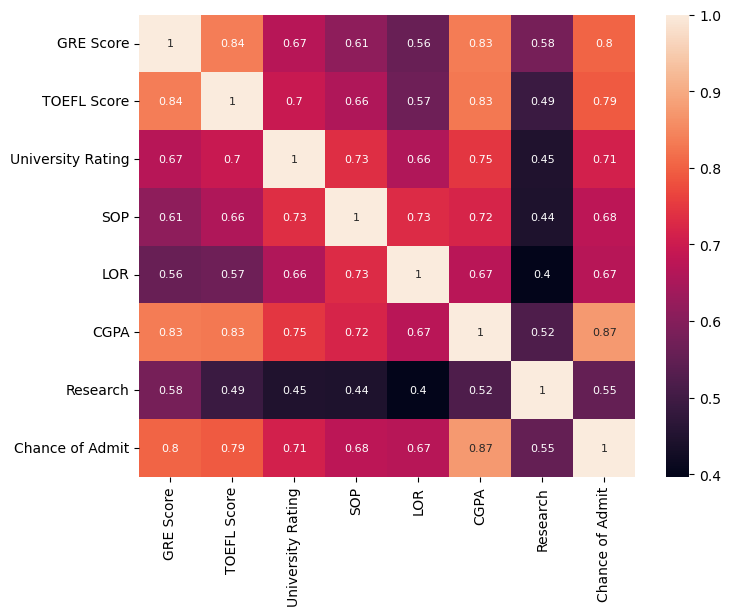

In [25]:
#check multicolinearity
plt.figure(figsize=(8,6))
sns.heatmap(data.corr(),annot=True,annot_kws={'size':8})
plt.show()

from above heatmap we can see there is no multicolinarity.

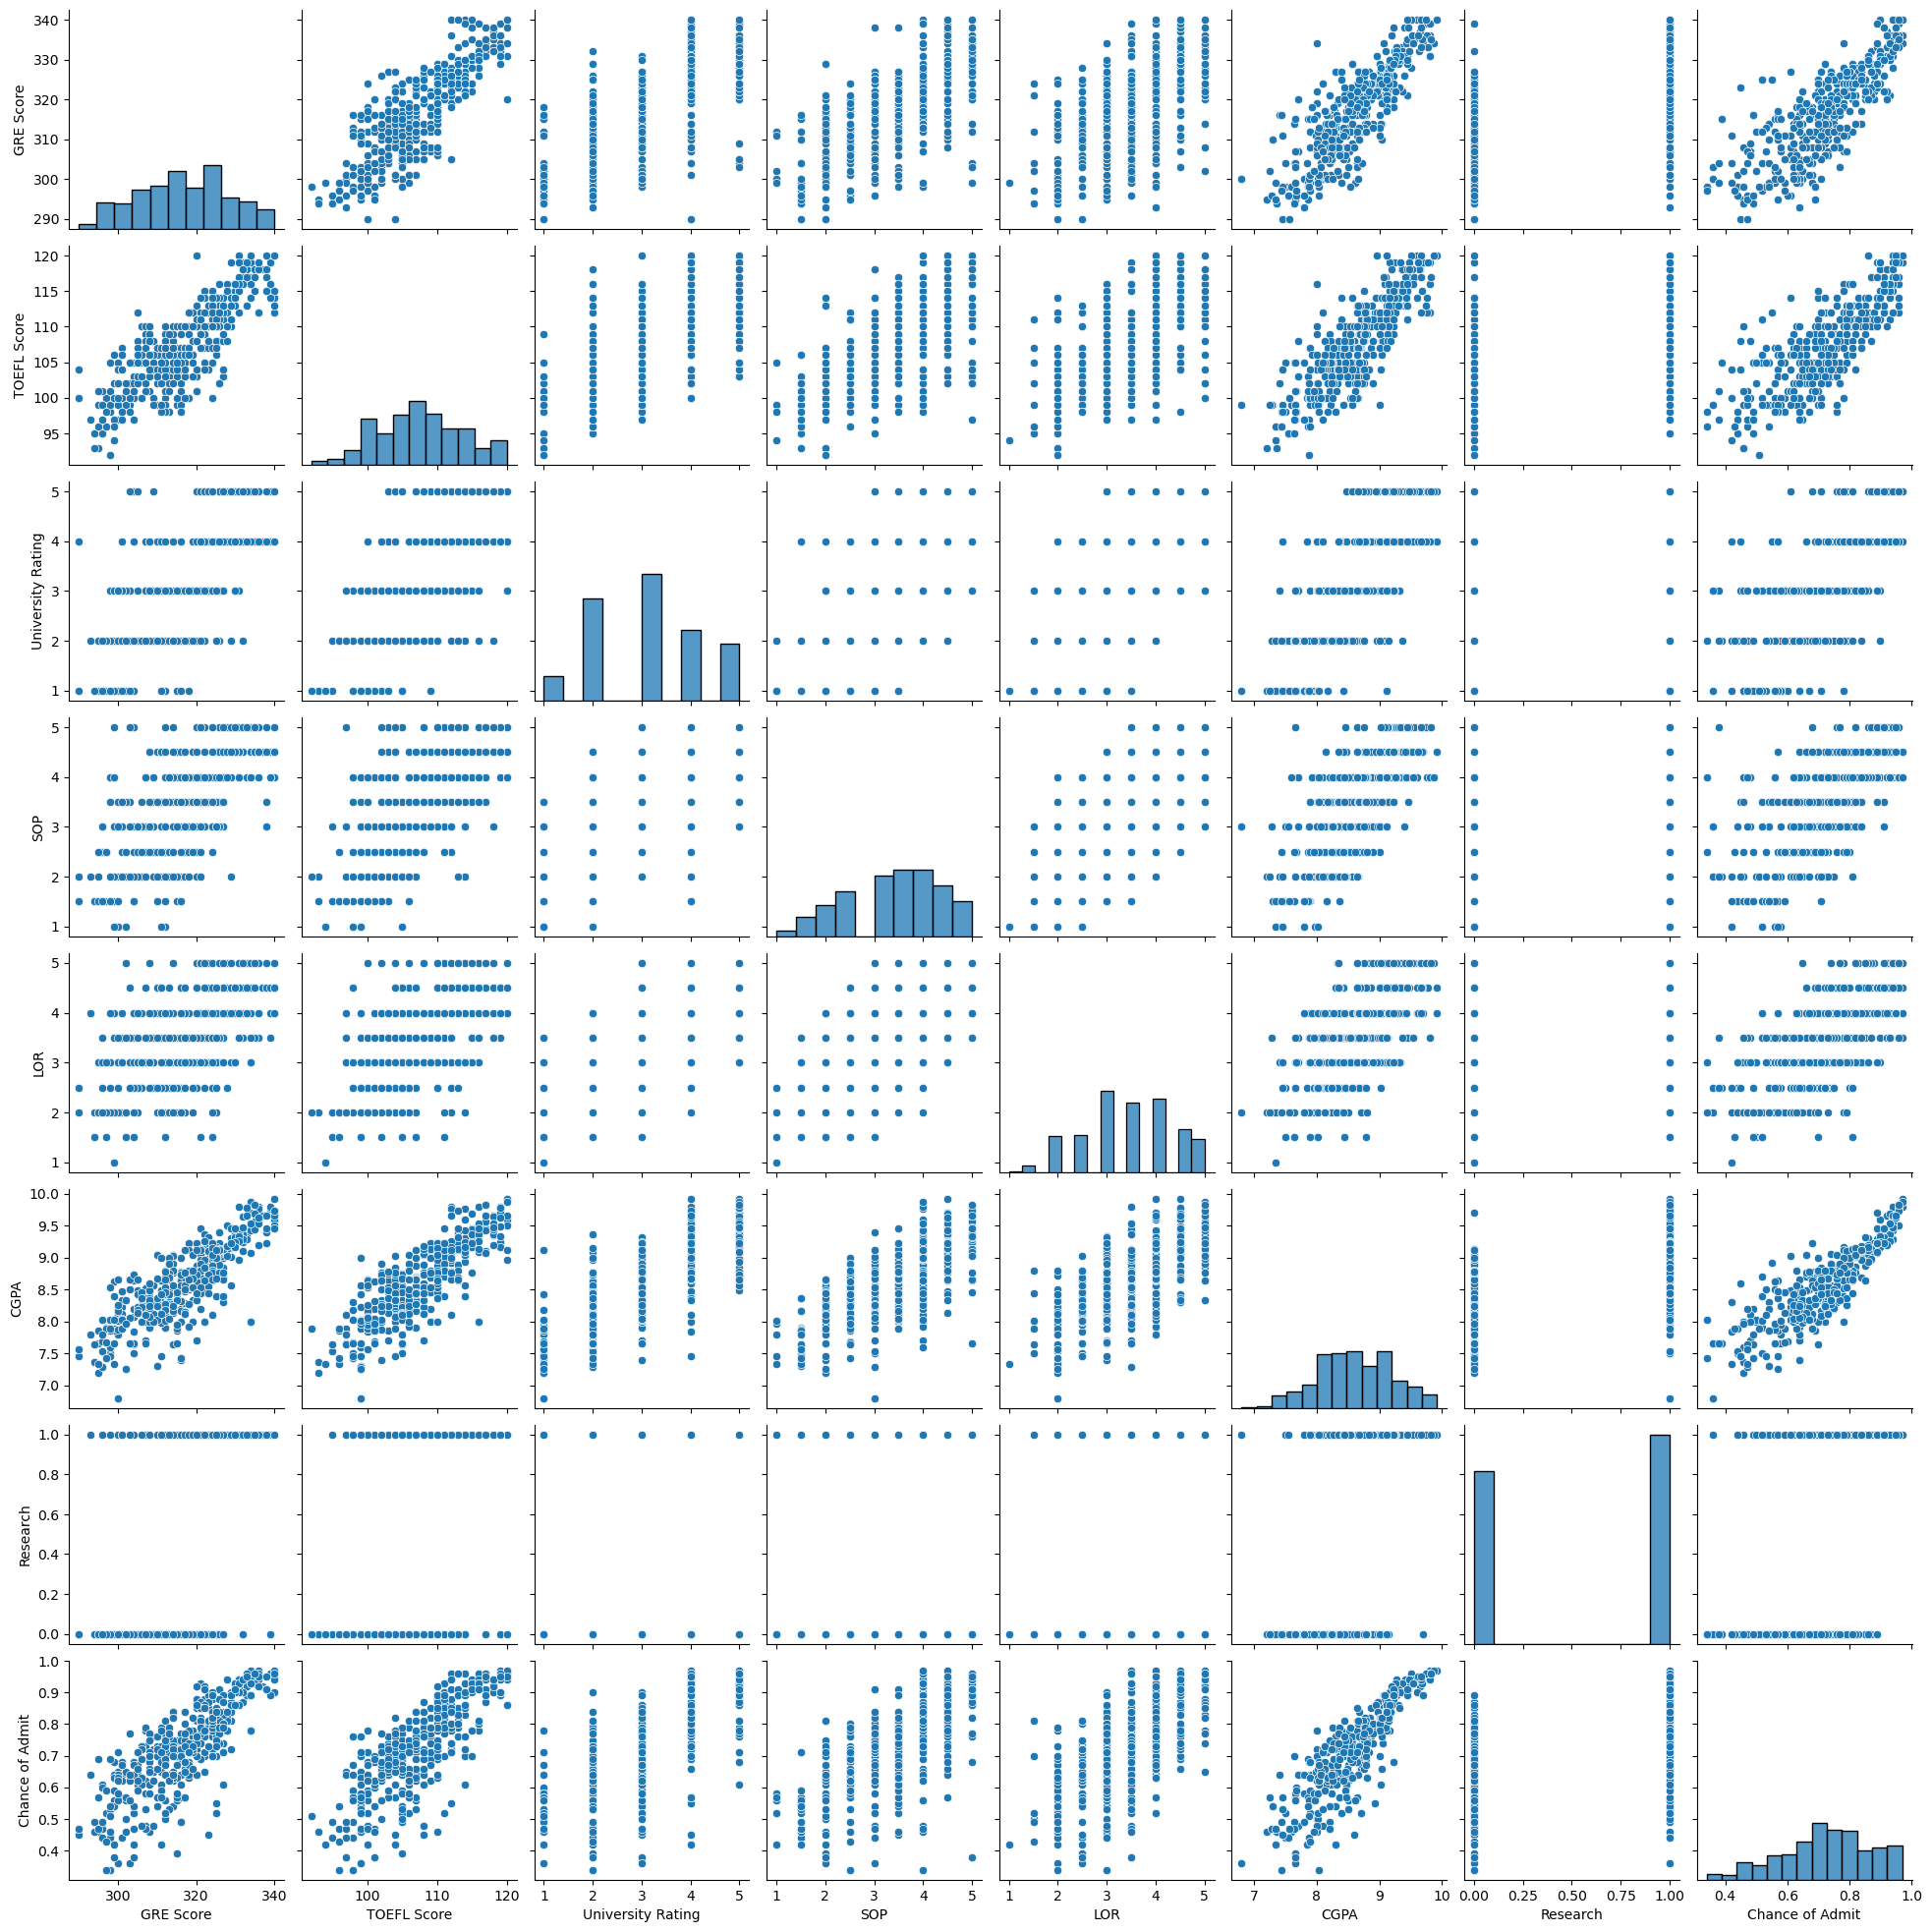

In [26]:
sns.pairplot(data)
plt.show()

from graph we can see there are almost all the columns have strong relationship with target variable.

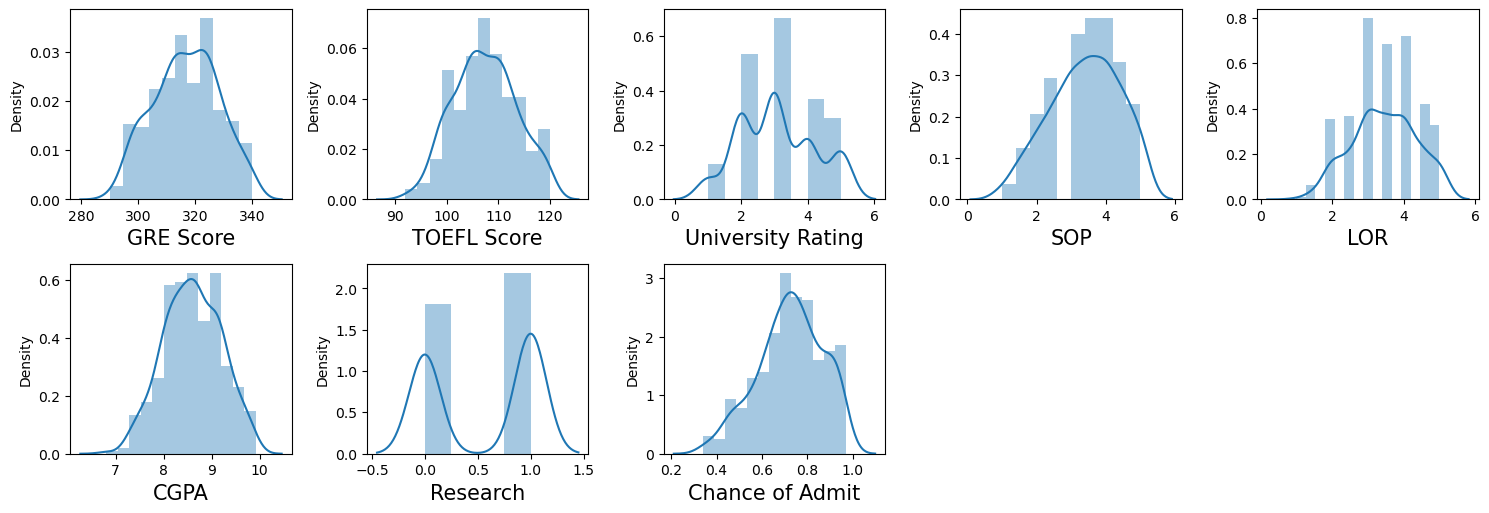

In [27]:
#Let's see the how data is distributed or Graphical analysis of all features
plt.figure(figsize=(15,20))
plotnumber=1
for column in data:
    if plotnumber<=40:
        ax=plt.subplot(8,5,plotnumber)
        sns.distplot(data[column])
        plt.xlabel(column,fontsize=15)
    plotnumber+=1
plt.tight_layout()

From distribusion we can see there is now skewness in dataset so lets check for the outliers.

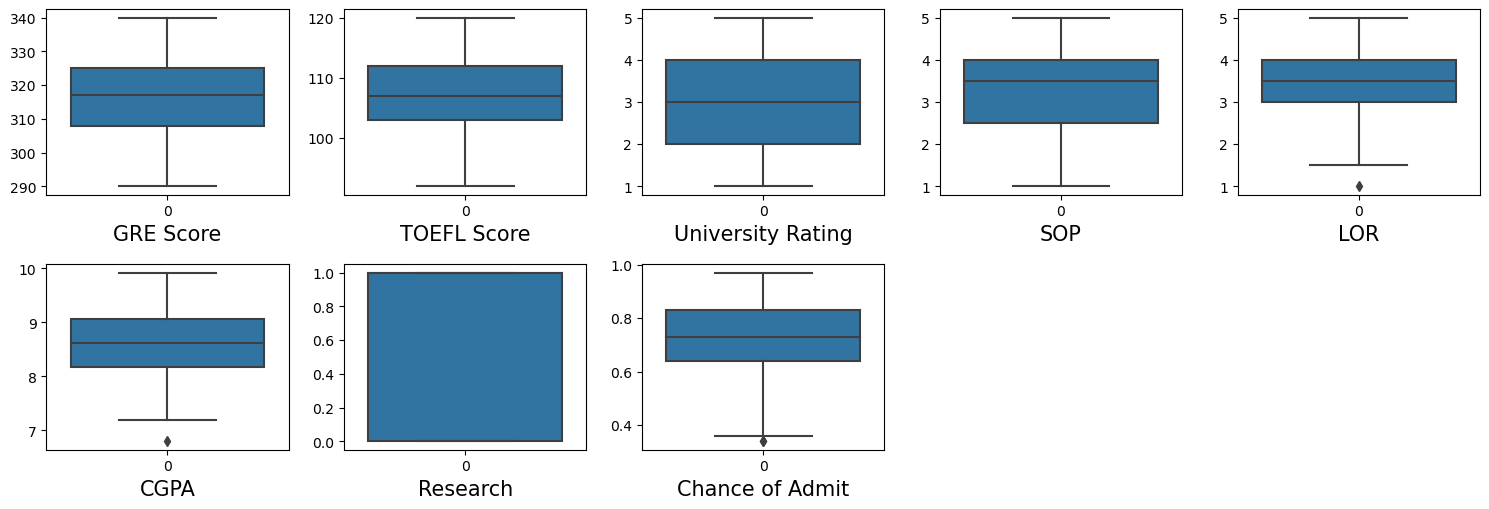

In [28]:
#Let's check for the Outliers
plt.figure(figsize=(15,20))
plotnumber=1
for column in data:
    if plotnumber<=40:
        ax=plt.subplot(8,5,plotnumber)
        sns.boxplot(data[column])
        plt.xlabel(column,fontsize=15)
    plotnumber+=1
plt.tight_layout()

from graph we can see there is outliers present in the colunms LOR, CGPA, Chance of Admit so lets deal with it by zscore.

In [29]:
# Separate the outliers columns
df1=['LOR', 'CGPA', 'Chance of Admit']

In [30]:
from scipy.stats import zscore
z_score=zscore(data[df1])
abs_z_score=np.abs(z_score)
filter_entry=(abs_z_score<3).all(axis=1)
data=data[filter_entry]
data.head(2)

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,337,118,4,4.5,4.5,9.65,1,0.92
1,324,107,4,4.0,4.5,8.87,1,0.76


In [31]:
data.shape

(399, 8)

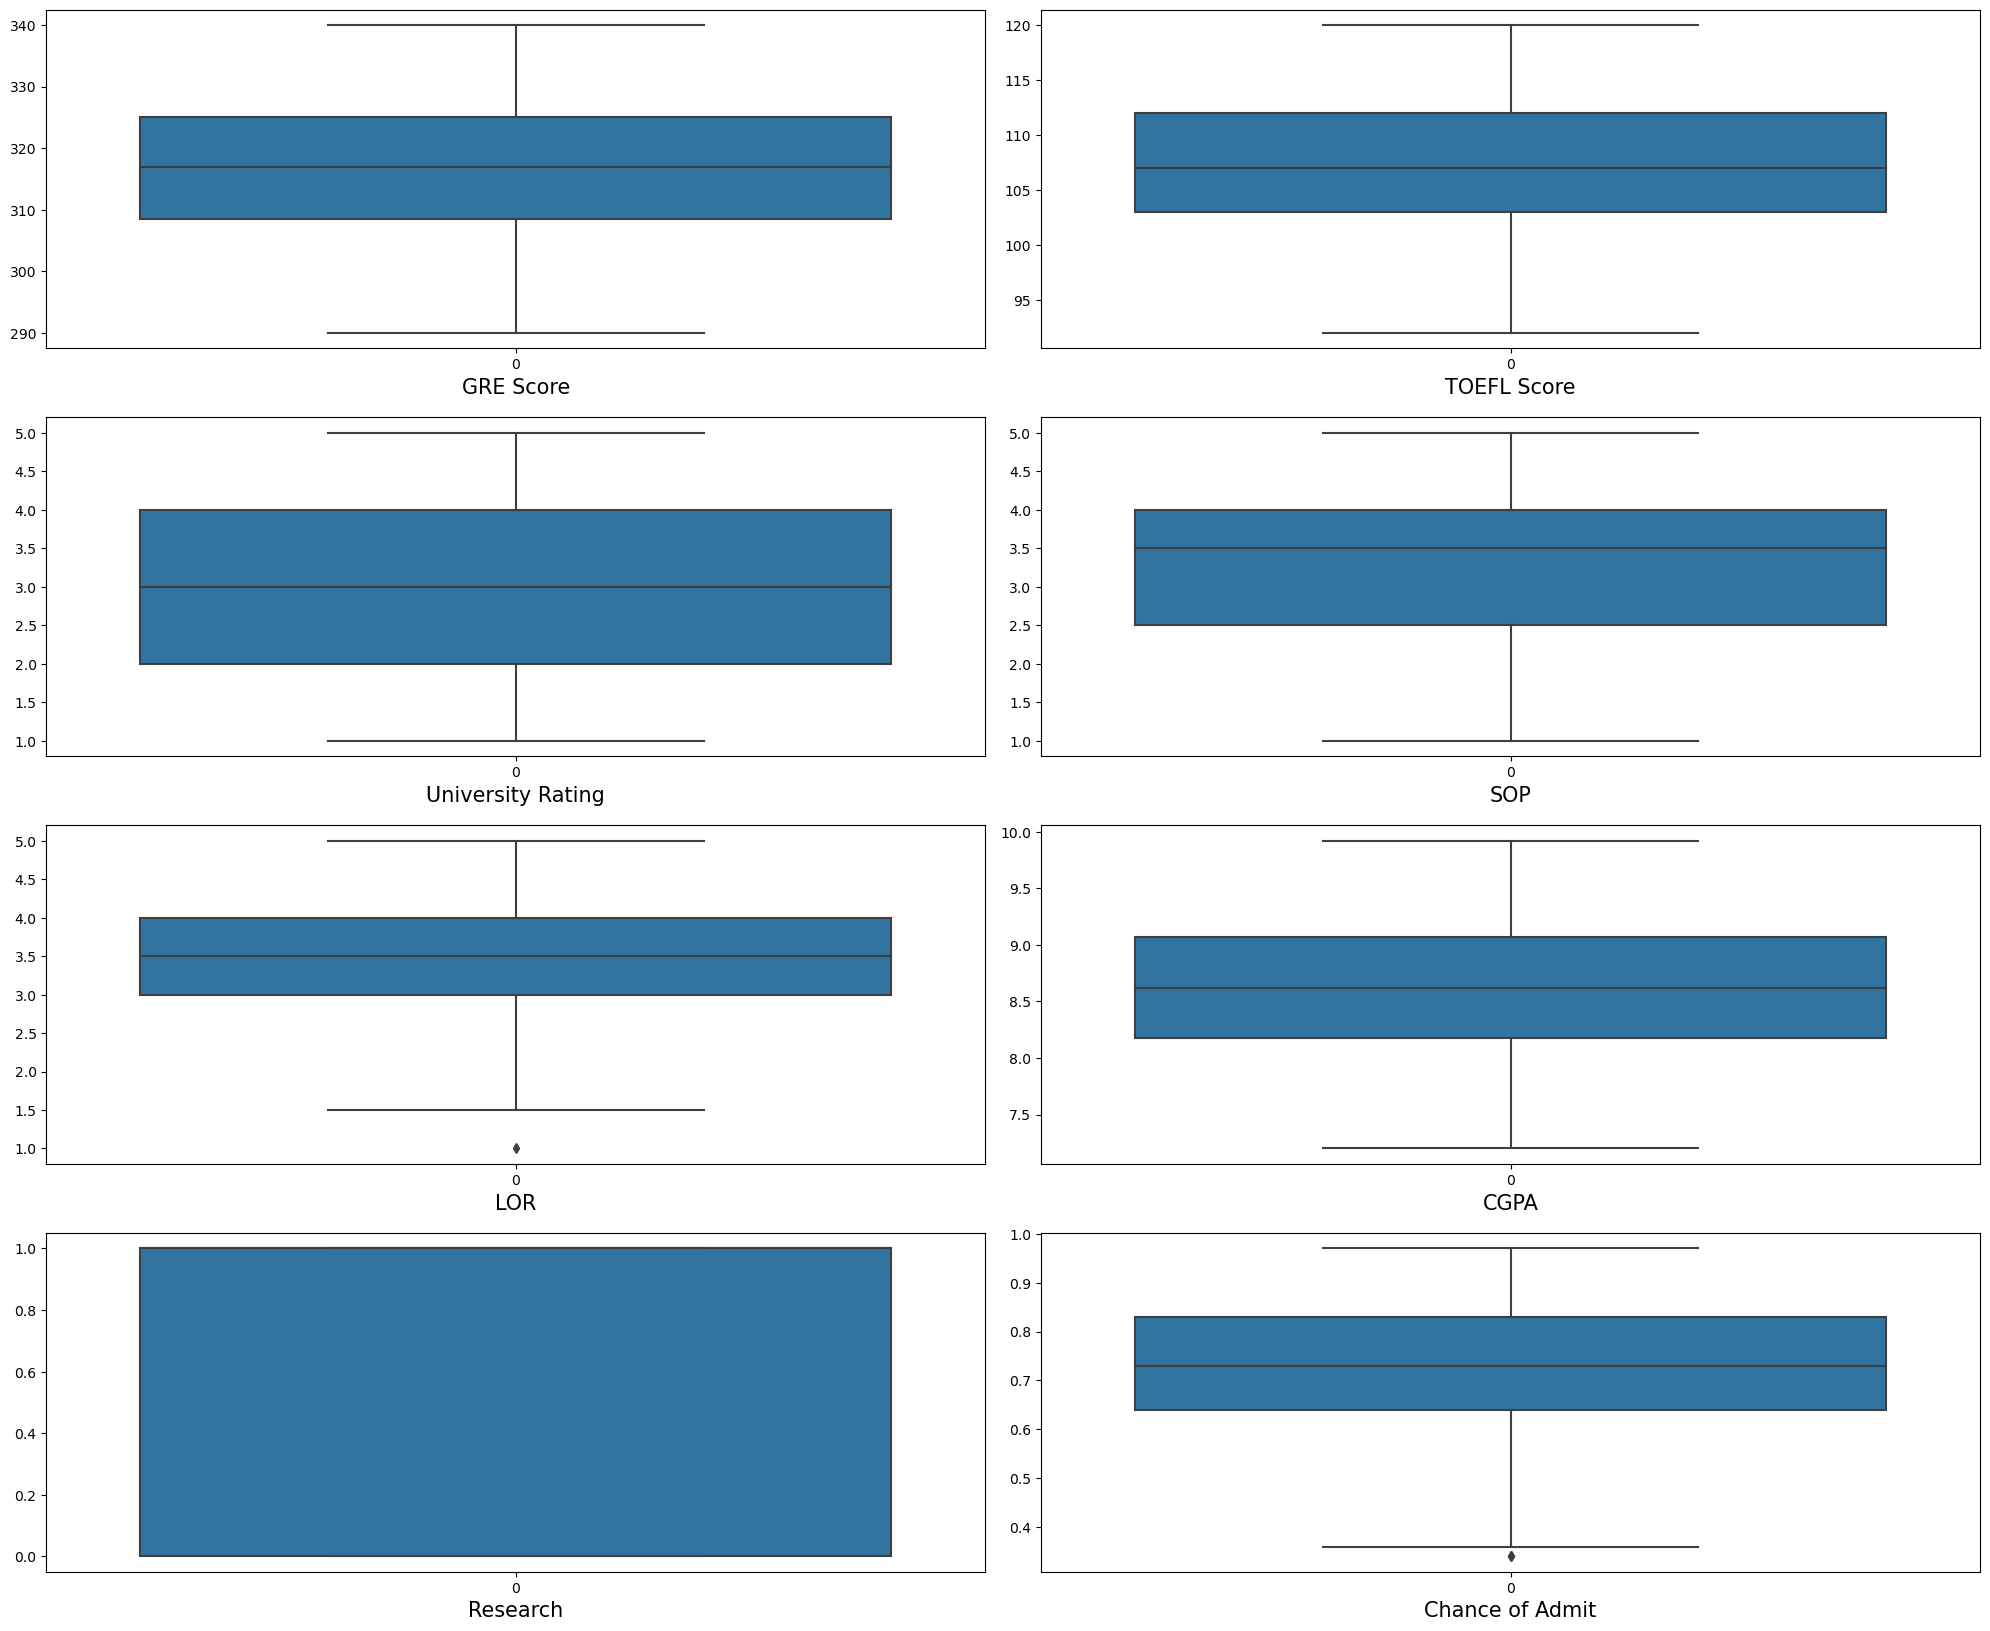

In [32]:
#Let's see plot after removing outliers
myFig=plt.figure(figsize=(20,20))
plotnumber=1
for column in data:
    if plotnumber<=10:
        ax=plt.subplot(5,2,plotnumber)
        sns.boxplot(data[column])
        plt.xlabel(column,fontsize=15)
    plotnumber+=1
plt.tight_layout()

Now, data looks good and outliers are treated well.

In [33]:
# Let's Seperate the data & visulize the relation between featurs & lable
x=data.drop(columns=['Chance of Admit'])
y=data['Chance of Admit']

In [34]:
# data stadardization
scale=StandardScaler()
x_scaled=scale.fit_transform(x)

In [35]:
#check multicolinearity
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif=pd.DataFrame()
vif["vif"]=[variance_inflation_factor(x_scaled,i) for i in range(x_scaled.shape[1])]
vif["featurs"]=x.columns
print(vif)

        vif            featurs
0  4.593892          GRE Score
1  4.279858        TOEFL Score
2  2.899845  University Rating
3  3.116848                SOP
4  2.417761                LOR
5  5.271519               CGPA
6  1.561307           Research


No colinarity in the variables

In [36]:
print(x.shape)
print(y.shape)

(399, 7)
(399,)


In [37]:
# Lets select the proper random state to build best model by using LogisticRegression

from sklearn.linear_model import LinearRegression

acc_score_test = 0
acc_score_train = 0
rand_state = 0
for i in range(1,200):
    
    x_train,x_test,y_train,y_test = train_test_split(x_scaled,y,test_size=0.30,random_state= i )
    
    lr = LinearRegression()
    lr.fit(x_train,y_train)
    
    y_pred=lr.predict(x_train) # prediction on train data
    r1 =r2_score(y_train,y_pred) # accuracy check on train data
    
    pred = lr.predict(x_test)   #prediction on test data
    r2 =r2_score(y_test,pred) #accuracy check on test data
    
    if r2 > acc_score_test and r1 > acc_score_train: # selecting max score accuracy
        acc_score_test = r2
        acc_score_train = r1
        rand_state = i
    print(f"at random sate {i}, the training accuracy is:- {acc_score_train}")
    print(f"at random sate {i}, the testing accuracy is:- {acc_score_test}")
    print("\n")
print('Best Training accuracy_score is {} on random state {}'.format(acc_score_train,rand_state))
print('Best Testing accuracy_score is {} on random state {}'.format(acc_score_test,rand_state))

at random sate 1, the training accuracy is:- 0.7675533123611014
at random sate 1, the testing accuracy is:- 0.8496553707883142


at random sate 2, the training accuracy is:- 0.7675533123611014
at random sate 2, the testing accuracy is:- 0.8496553707883142


at random sate 3, the training accuracy is:- 0.7675533123611014
at random sate 3, the testing accuracy is:- 0.8496553707883142


at random sate 4, the training accuracy is:- 0.7675533123611014
at random sate 4, the testing accuracy is:- 0.8496553707883142


at random sate 5, the training accuracy is:- 0.7675533123611014
at random sate 5, the testing accuracy is:- 0.8496553707883142


at random sate 6, the training accuracy is:- 0.7675533123611014
at random sate 6, the testing accuracy is:- 0.8496553707883142


at random sate 7, the training accuracy is:- 0.7675533123611014
at random sate 7, the testing accuracy is:- 0.8496553707883142


at random sate 8, the training accuracy is:- 0.7675533123611014
at random sate 8, the testing acc

In [38]:
rand_state

74

In [39]:
#Lets split for train and test data
x_train,x_test,y_train,y_test = train_test_split(x_scaled,y,test_size=0.30,random_state= rand_state )

In [40]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(279, 7)
(120, 7)
(279,)
(120,)


# Lets Build The Model

In [41]:
from sklearn.linear_model import LinearRegression
LR= LinearRegression()

from sklearn.tree import DecisionTreeRegressor
dt=DecisionTreeRegressor()

from sklearn.ensemble import AdaBoostRegressor, GradientBoostingRegressor
ada=AdaBoostRegressor()
gb=GradientBoostingRegressor()

from sklearn.ensemble import RandomForestRegressor
rfc= RandomForestRegressor()


import xgboost as xgb
xgb=xgb.XGBRegressor()

from sklearn.neighbors import KNeighborsRegressor
knn=KNeighborsRegressor()

from sklearn.model_selection import cross_val_score


models=[]
models.append(('LinearRegression', LR))
models.append(('DecisionTreeRegressor', dt))
models.append(('AdaBoostRegressor', ada))
models.append(('GradientBoostingRegressor', gb))
models.append(('RandomForestRegressor', rfc))
models.append(('XGBRegressor', xgb))
models.append(('KNeighborsRegressor', knn))


In [42]:
m=[]
score=[]
score2=[]
cv_score=[]
MAE_score=[]
MSE_score=[]
for name, model in models:
    print('***********************',name,'***********************')
    m.append(name)
    model.fit(x_train, y_train)
    print(model)
    y_pred=model.predict(x_train)
    AS=r2_score(y_train,y_pred)
    print("Train Report:",AS)
    score.append(AS*100)
    
    pred=model.predict(x_test)
    AS2=r2_score(y_test,pred)
    print("Test Report:",AS2)
    score2.append(AS2*100)
    MAE=mae(y_test,pred)
    print("Mean Squered Error:",MAE)
    MAE_score.append(MAE*100)
    MSE=mse(y_test,pred)
    print("Mean Absolute Error:", MSE)
    MSE_score.append(MSE*100)
    
    accuracies= cross_val_score(model,x,y, cv=2)
    print("Accuracy: {:.2f} %".format(accuracies.mean()*100))
    cv_score.append(accuracies.mean()*100)
    print("Standard Deviation: {:.2f} %".format(accuracies.std()*100))
    print('\n')

*********************** LinearRegression ***********************
LinearRegression()
Train Report: 0.7749687745806133
Test Report: 0.853676014039024
Mean Squered Error: 0.04057698691205515
Mean Absolute Error: 0.0026760055716956535
Accuracy: 76.81 %
Standard Deviation: 4.14 %


*********************** DecisionTreeRegressor ***********************
DecisionTreeRegressor()
Train Report: 1.0
Test Report: 0.5080622622938866
Mean Squered Error: 0.06666666666666667
Mean Absolute Error: 0.008996666666666668
Accuracy: 55.21 %
Standard Deviation: 1.75 %


*********************** AdaBoostRegressor ***********************
AdaBoostRegressor()
Train Report: 0.8064210519945123
Test Report: 0.7006387189326491
Mean Squered Error: 0.061834595592608003
Mean Absolute Error: 0.00547478563288884
Accuracy: 71.58 %
Standard Deviation: 0.37 %


*********************** GradientBoostingRegressor ***********************
GradientBoostingRegressor()
Train Report: 0.9323713109426657
Test Report: 0.76682880360805
Mean

In [43]:
print(len(m),len(score),len(score2),len(cv_score),len(MAE_score),len(MSE_score))

7 7 7 7 7 7


In [44]:
result = pd.DataFrame({'Model': m, 'Accuracy_train_score': score,'Accuracy_test_score': score2 ,'Cross_val_score':cv_score, 'MAE_score':MAE_score,'MSE_score':MSE_score })
result

,Model,Accuracy_train_score,Accuracy_test_score,Cross_val_score,MAE_score,MSE_score
0,LinearRegression,77.496877,85.367601,76.806515,4.057699,0.267601
1,DecisionTreeRegressor,100.000000,50.806226,55.210026,6.666667,0.899667
2,AdaBoostRegressor,80.642105,70.063872,71.579483,6.183460,0.547479
3,GradientBoostingRegressor,93.237131,76.682880,72.028036,4.723376,0.426429
4,RandomForestRegressor,96.361877,74.604613,73.360380,4.989750,0.464436
5,XGBRegressor,99.980989,69.627745,68.695367,5.259002,0.555455
6,KNeighborsRegressor,82.407599,77.127356,63.364265,4.860000,0.418300


In [45]:
result['lest_diff']=(result['Accuracy_test_score']-result['Cross_val_score'])
result

,Model,Accuracy_train_score,Accuracy_test_score,Cross_val_score,MAE_score,MSE_score,lest_diff
0,LinearRegression,77.496877,85.367601,76.806515,4.057699,0.267601,8.561086
1,DecisionTreeRegressor,100.000000,50.806226,55.210026,6.666667,0.899667,-4.403800
2,AdaBoostRegressor,80.642105,70.063872,71.579483,6.183460,0.547479,-1.515612
3,GradientBoostingRegressor,93.237131,76.682880,72.028036,4.723376,0.426429,4.654844
4,RandomForestRegressor,96.361877,74.604613,73.360380,4.989750,0.464436,1.244234
5,XGBRegressor,99.980989,69.627745,68.695367,5.259002,0.555455,0.932377
6,KNeighborsRegressor,82.407599,77.127356,63.364265,4.860000,0.418300,13.763091


From above we can see there are two models have least diffrance between crass validation score to test accuracy is AdaBoostRegressor and XGBRegressor. But AdaBoostRegressor has high accuracy 71% so i am selecting the  AdaBoostRegressor.

# HyperParameter Tuning

In [46]:
# Hyper tuning by using RandomizedSearchCV With RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV

para={'n_estimators':[4,6,7],'learning_rate':[0.1,0.09],'random_state':[20,10,30]}
rand=RandomizedSearchCV(estimator=ada, cv=5,param_distributions=para)
rand.fit(x_train,y_train)

rand.best_params_

{'random_state': 20, 'n_estimators': 7, 'learning_rate': 0.1}

In [47]:
ada=AdaBoostRegressor(random_state= 20, n_estimators= 6, learning_rate= 0.1)
                          

ada.fit(x_train,y_train)
y_pred=ada.predict(x_train)
AS=r2_score(y_train,y_pred)
print("Train Report:",AS*100) 
pred=ada.predict(x_test)
AS2=r2_score(y_test,pred)
print("Test Report:",AS2*100)
MAE=mae(y_test,pred)
print("Mean Squered Error:",MAE)
MSE=mse(y_test,pred)
print("Mean Absolute Error:", MSE)
    
accuracies= cross_val_score(ada,x, y, cv=2)
print("Accuracy: {:.2f} %".format(accuracies.mean()*100))
cv_score.append(accuracies.mean()*100)
print("Standard Deviation: {:.2f} %".format(accuracies.std()*100))

Train Report: 79.1742404754842
Test Report: 79.07628241989133
Mean Squered Error: 0.04671506296276944
Mean Absolute Error: 0.0038265759682004517
Accuracy: 72.20 %
Standard Deviation: 2.44 %


As we seen the accuracy is increased by 1.2%. So, lets check with grid search CV as well.

In [48]:
# Hyper tuning by using RandomizedSearchCV With RandomForestClassifier
from sklearn.model_selection import GridSearchCV

para={'n_estimators':[4,6,7],'learning_rate':[0.1,0.09],'random_state':[20,10,30]}
grid=GridSearchCV(estimator=ada, cv=2,param_grid=para)
grid.fit(x_train,y_train)

grid.best_params_

{'learning_rate': 0.09, 'n_estimators': 7, 'random_state': 10}

In [49]:
ada=AdaBoostRegressor(random_state= 10, n_estimators= 7, learning_rate= 0.09)
                          

ada.fit(x_train,y_train)
y_pred=ada.predict(x_train)
AS=r2_score(y_train,y_pred)
print("Train Report:",AS*100) 
pred=ada.predict(x_test)
AS2=r2_score(y_test,pred)
print("Test Report:",AS2*100)
MAE=mae(y_test,pred)
print("Mean Squered Error:",MAE)
MSE=mse(y_test,pred)
print("Mean Absolute Error:", MSE)
    
accuracies= cross_val_score(ada,x, y, cv=5)
print("Accuracy: {:.2f} %".format(accuracies.mean()*100))
cv_score.append(accuracies.mean()*100)
print("Standard Deviation: {:.2f} %".format(accuracies.std()*100))

Train Report: 78.96554487612843
Test Report: 77.41165778932807
Mean Squered Error: 0.050153044462516914
Mean Absolute Error: 0.004131006219803704
Accuracy: 71.63 %
Standard Deviation: 7.83 %


# So, Finally after hyper Tunning we see the better accuracy is with reandomised search CV for ADABoosting Regressor so i am selecting the same with 72%.

In [50]:
# Save Model
import pickle
file='Final_model.pickle'
model=pickle.dump(ada,open(file,'wb'))